# Multiple Logistic Regression (Poison Mushrooms)

In [77]:
attributes=['poison-class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
len(attributes)

23

In [78]:
import sys # Module to process commands to/from the OS using a shell-type syntax
import requests
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/logisticregression/agaricus-lepiota.data"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('poisonmushroom.csv','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file
# delete file if it exists

In [79]:
import pandas as pd
mymushroom = pd.read_csv('poisonmushroom.csv',header=None)


In [80]:
req_col_names = attributes
curr_col_names = list(mymushroom.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

mymushroom = mymushroom.rename(columns=mapper)
interim = pd.DataFrame(mymushroom)
mymushroom.head(20)

,poison-class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [81]:
mymushroom.head(10)

,poison-class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [82]:
def p0(stringvalue):
    if stringvalue == 'e':
        p0 = 0
    elif stringvalue == 'p':
        p0 = 1
    else: 
        raise Exception("Encoding failed in p0 missing data maybe?")
    return(p0)
######################################################################
# Feature Encoding Functions using a Simple Substitution Cipher     ##
######################################################################
def c1(stringvalue):
#cap-shape:  bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
    ncode=True # set exception flag
    alphabet=['b','c','x','f','k','s']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c1=i
            ncode=False #  if encoding swithc flag value
    if ncode:
        raise Exception("Encoding failed in c1 missing data maybe?")
    return(c1)
######################################################################
def c2(stringvalue):
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    ncode=True
    alphabet=['f','g','y','s']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c2=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c2 missing data maybe?")
    return(c2)
######################################################################
def c3(stringvalue):
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
    ncode=True
    alphabet=['n','b','c','g','r','p','u','e','w','y']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c3=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c3 missing data maybe?")
    return(c3)
######################################################################
def c4(stringvalue): #this is a simple binary encoding column
#bruises?:bruises=t,no=f
    ncode=True
    alphabet=['f','t']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c4=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c4 missing data maybe?")
    return(c4)
######################################################################
def c5(stringvalue):
#odor:  almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
    ncode=True
    alphabet=['a','l','c','y','f','m','n','p','s']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c5=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c5 missing data maybe?")
    return(c5)
######################################################################
def c6(stringvalue):
#gill-attachment: attached=a,descending=d,free=f,notched=n
    ncode=True
    alphabet=['a','d','f','n']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c6=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c6 missing data maybe?")
    return(c6)
######################################################################
def c7(stringvalue):
#gill-spacing: close=c,crowded=w,distant=d
    ncode=True
    alphabet=['c','w','d']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c7=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c7 missing data maybe?")
    return(c7)
######################################################################
def c8(stringvalue):
#gill-size:  broad=b,narrow=n
    ncode=True
    alphabet=['b','n']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c8=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c8 missing data maybe?")
    return(c8)
######################################################################
def c9(stringvalue):
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
    ncode=True
    alphabet=['k','n','b','h','g','r','o','p','u','e','w','y']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c9=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c9 missing data maybe?")
    return(c9)

######################################################################
def c23(stringvalue):
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d   
    ncode=True
    alphabet=['g','l','m','p','u','w','d']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c23=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c23 missing data maybe?")
    return(c23)

interim['poison-class']    = mymushroom['poison-class'].apply(p0)
interim['cap-shape']       = mymushroom['cap-shape'].apply(c1)
interim['cap-surface']     = mymushroom['cap-surface'].apply(c2)
interim['cap-color']       = mymushroom['cap-color'].apply(c3)
interim['bruises']         = mymushroom['bruises'].apply(c4)
interim['odor']            = mymushroom['odor'].apply(c5)
interim['gill-attachment'] = mymushroom['gill-attachment'].apply(c6)
interim['gill-spacing']    = mymushroom['gill-spacing'].apply(c7)
interim['gill-size']       = mymushroom['gill-size'].apply(c8)
interim['gill-color']      = mymushroom['gill-color'].apply(c9)
interim['habitat']         = mymushroom['habitat'].apply(c23)

In [83]:
interim.head()

,poison-class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,1,7,2,0,1,0,...,s,w,w,p,w,o,p,k,s,4
1,0,2,3,9,1,0,2,0,0,0,...,s,w,w,p,w,o,p,n,n,0
2,0,0,3,8,1,1,2,0,0,1,...,s,w,w,p,w,o,p,n,n,2
3,1,2,2,8,1,7,2,0,1,1,...,s,w,w,p,w,o,p,k,s,4
4,0,2,3,3,0,6,2,1,0,0,...,s,w,w,p,w,o,e,n,a,0


In [84]:
#split dataset in features and target variable
feature_cols = ['cap-shape', 'cap-surface','cap-color','bruises','odor','gill-attachment','gill-size','gill-color','habitat']
X = interim[feature_cols] # Features
y = interim['poison-class'] # Target variable
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [85]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [86]:
print(logreg.intercept_[0])
print(logreg.coef_)
#y.head()

-2.3918244620471896
[[ 0.19498912  0.34069315  0.05342991 -2.45157961 -0.24278799  1.14986083
   2.3273071  -0.00278943  0.11759111]]


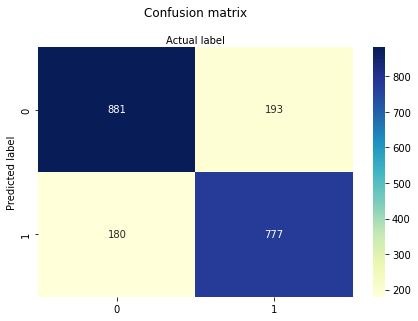

In [87]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label');

SyntaxError: invalid syntax (<ipython-input-88-141382bd93ed>, line 3)